In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
from datetime import datetime
from datetime import timedelta

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
# reflect the tables
Base = automap_base()
Base.prepare(engine, reflect = True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.

# Create the inspector and connect it to the engine
inspector = inspect(engine)

print("Station table columns:")
# Use the inspector to print the column names within the 'measurement' and 'station' tables and their types
station_columns = inspector.get_columns('station')
for column in station_columns:
    print(column)

print("")
print("Measurement table columns:")
measurement_columns = inspector.get_columns('measurement')
for column in measurement_columns:
    print(column)

Station table columns:
{'name': 'id', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}
{'name': 'station', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'name', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'latitude', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'longitude', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'elevation', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}

Measurement table columns:
{'name': 'id', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}
{'name': 'station', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'date', 'type': TEXT(), '

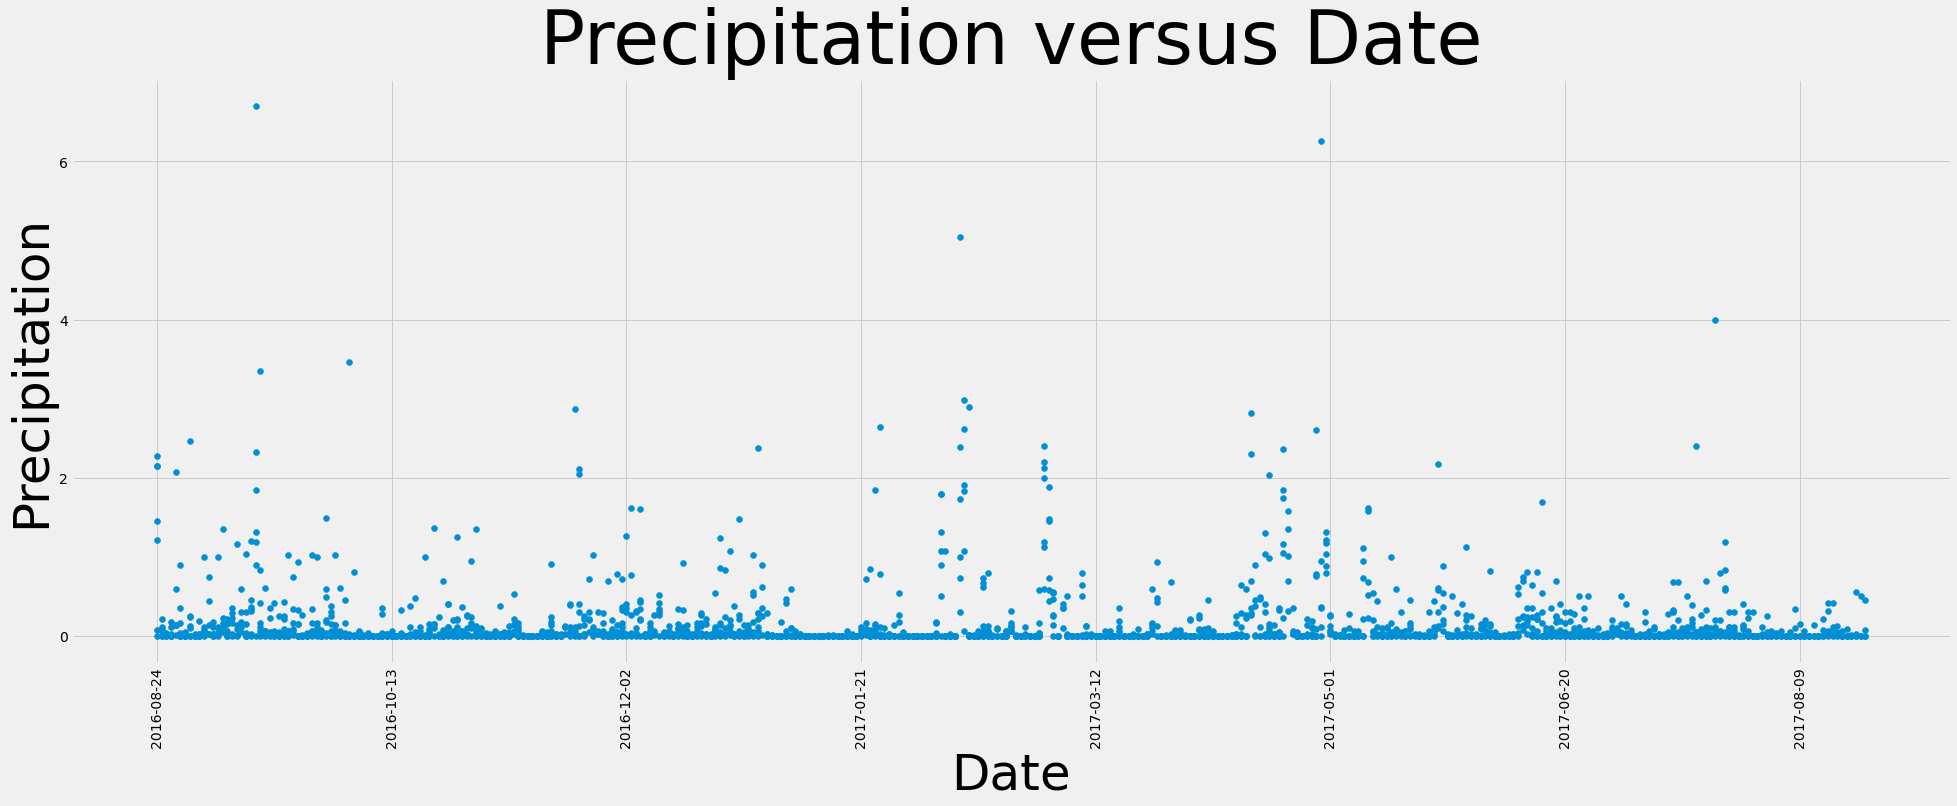

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
latest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()

Year = int(latest_date[0][0:4])
Month = int(latest_date[0][5:7])
Day = int(latest_date[0][8:])

latest_date_ref = datetime(Year, Month, Day)
latest_date_minus_year = latest_date_ref - timedelta(days = 365)

# Perform a query to retrieve the data and precipitation scores
# Sort the dataframe by date
latest = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= latest_date_minus_year).order_by(Measurement.date).all()

latest_df = pd.DataFrame(latest)
latest_df['prcp'] = latest_df['prcp'].fillna(0)

# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize = (30,10))
plt.xticks(rotation='vertical')
plt.rc('xtick', labelsize=50) 
plt.rc('ytick', labelsize=50) 
plt.xticks(np.arange(0, 2500, step=50))
plt.scatter(latest_df['date'], latest_df['prcp'])
plt.title("Precipitation versus Date", fontsize = 75)
plt.xlabel("Date", fontsize = 50)
plt.ylabel("Precipitation", fontsize = 50)
plt.show()

In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data
latest_df.describe()

,prcp
count,2223.000000
mean,0.159951
std,0.441220
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number stations in the dataset
stations = session.query(Station).group_by(Station.station).count()
print(stations)

9


In [13]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()[0]

(54.0, 85.0, 71.66378066378067)

# Close session

In [15]:
# Close Session
session.close()